<a href="https://colab.research.google.com/github/ProjectToDesenv/PosGraduacao2021-algorithms-DSM4/blob/master/Tributacao_ICMS_RS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introdução**
Predizendo Valores de Repasses de ICMS do estado do Rio Grande do Sul aos municípios gaúchos
---
Neste projeto, utilizamos o processo CRISP-DM para predizer valores de repasses de ICMS aos municípios gaúchos para 2021 utilizando a série história de dados dos anos anteriores, de 2014 a 2020.


**Business Understanding**

O processo CRISP-DM inicia com o entendimento do problema de negócio.
Pelo regramento constitucional brasileiro, no art. 158, Inciso IV da CF/88, 25% do produto da arrecadação do ICMS deve repassados pelos estados aos municípios onde o fato gerador tenha ocorrido. A CF/88, em conjunto com a legislação estadual, estabelece critérios para o parcelamento dos repasses; estes, porém não são relevantes para este estudo, pois nos baseamos em dados publicizados no site do Tesouro do Estado (https://tesouro.fazenda.rs.gov.br/lista/568/transferencias-aos-municipios), os quais já traziam os dados de repasses líquidos consolidados para cada ano da séire histórica.

Imagine que o Tesouro do Estado do RS queira fazer uma previsão, baseada na série histórica, de quanto dispenderá em recursos a título de repasse de ICMS aos 497 municípios gaúchos em 2021. Podemos fazer outro exercício e imaginarmos o prefeito de qualquer um dos municípios querendo saber quanto receberá de repasse deste tributo em 2021. 

**Data Understanding**

No site do Tesouro do Estado estão disponíneis com os dados mensais de cada ano desde 2005 a 2020 (https://www.sefaz.rs.gov.br/Site/MontaMenu.aspx?MenuAlias=m_repasses_mun_icms). As planilhas do mês de dezembro , desde o ano de 2014, trazem o acumulado líquido do anoem sua última coluna. Foi nestas colunas das planilhas de dezembro dos anos de 2014, 2015, 2016, 2017, 2018, 2019 e 2020 que nos baseamos para fazermos este projeto.


**Data Preparation**

Fizemos o download, portanto, de 7 planilhas com o mês de dezembro de cada ano, e deles retiramos a coluna de acumulado líquido e consolidamos os valores de todos os anos numa planilha só no Pandas. Convertemos a planilha resultante para CSV conforme abaixo:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn.model_selection as ms
lr = LinearRegression()

#%matplotlib inline

#Consolidação de valores  líquidos anuais em uma planilha só do Excel:
data = pd.DataFrame(pd.read_excel("RepassesMunicipiosICMS-Dezembro2014.xls"))
dataframe = data[['MUNICIPIO']]
dataframe['2014'] = data.iloc[:,-1]
data = pd.DataFrame(pd.read_excel("RepassesMunicipiosICMS-Dezembro2015.xls"))
dataframe['2015'] = data.iloc[:,-1]
data = pd.DataFrame(pd.read_excel("RepassesMunicipiosICMS-Dezembro2016.xls"))
dataframe['2016'] = data.iloc[:,-1]
data = pd.DataFrame(pd.read_excel("RepassesMunicipiosICMS-Dezembro2017.xls"))
dataframe['2017'] = data.iloc[:,-1]
data = pd.DataFrame(pd.read_excel("RepassesMunicipiosICMS-Dezembro2018.xls"))
dataframe['2018'] = data.iloc[:,-1]
data = pd.DataFrame(pd.read_excel("RepassesMunicipiosICMS-Dezembro2019.xls"))
dataframe['2019'] = data.iloc[:,-1]
data = pd.DataFrame(pd.read_excel("RepassesMunicipiosICMS-Dezembro2020.xls"))
dataframe['2020'] = data.iloc[:,-1]

#Eliminação de linhas inúteis no início e no final do dataframe:
temp = dataframe.drop([0,0])
data = temp.drop([498,498])


#conversão do arquivo para cvs
data.to_csv ("Consolidado 20142020.csv", 
                  index = None,
                  header=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [5]:
#Nomeia as colunas do arquivo Repasses 20142020.csv com os itens da lista
data = pd.read_csv(r"Consolidado 20142020.csv")
data.head()

,MUNICIPIO,2014,2015,2016,2017,2018,2019,2020
0,ACEGUA,5502348.54,6075183.99,6622279.67,7176277.38,8166737.65,8744664.36,8889621.64
1,AGUA SANTA,3799378.01,3983286.46,4416318.24,4918023.68,5651324.66,5896371.31,6353422.28
2,AGUDO,6919789.33,7691367.16,8660675.82,8704848.42,9635339.65,10235133.02,10014811.71
3,AJURICABA,4282806.44,4254569.30,4674617.27,4985308.44,5914442.24,6420232.67,6669565.67
4,ALECRIM,2753456.68,2928085.58,3219747.60,3394479.72,3819069.32,3917244.34,3967990.44


In [6]:
#Copia o dataframe da coluna 2014 a 2019 para a variável "a"
a = data.iloc[:,1:-1]

In [7]:
a.head()

,2014,2015,2016,2017,2018,2019
0,5502348.54,6075183.99,6622279.67,7176277.38,8166737.65,8744664.36
1,3799378.01,3983286.46,4416318.24,4918023.68,5651324.66,5896371.31
2,6919789.33,7691367.16,8660675.82,8704848.42,9635339.65,10235133.02
3,4282806.44,4254569.30,4674617.27,4985308.44,5914442.24,6420232.67
4,2753456.68,2928085.58,3219747.60,3394479.72,3819069.32,3917244.34


In [8]:
#Copia o dataframe da coluna 2020 para a variável "b"
b = data.iloc[:,-1]


In [9]:
b.head()

0     8889621.64
1     6353422.28
2    10014811.71
3     6669565.67
4     3967990.44
Name: 2020, dtype: float64

**Modeling**

In [10]:
# Divide o dataframe em 2/3 para treino e 1/3 para teste
a_train, a_test, b_train, b_test = ms.train_test_split(a, b, test_size = 1/3, random_state = 0)

In [11]:
# Treina o algoritmo com 2/3 dos dados de 2014 a 2019 sobre repasses de recursos aos municípios
treino1 = lr.fit(a_train, b_train)

In [12]:
# O algoritmo, já treinado, tenta predizer 1/3 dos dados de 2020 com base em 1/3 dos valores de 2014 a 2019
predicao1 = lr.predict(a_test)

**Evaluation**

In [15]:
treino1.intercept_

99521.39346331544

In [16]:
treino1.coef_

array([ 0.03193074,  0.37487006, -0.71901049,  0.58539891, -0.39127879,
        1.17215837])

In [13]:
# Os dados previstos na linha anterior são comparados com os dados de teste de 2020 para apuração da acurácia do algoritmo 
acuracia1 = r2_score(b_test, predicao1)

In [14]:
# Acurácia apurada de quase 100%
print(acuracia1)

0.9961241262633481


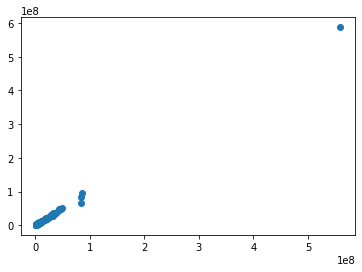

In [17]:
# Gráfico de disperção demonstra linearidade entre dados preditos e ocorridos
plt.scatter(b_test, predicao1)
plt.show()

**Deployment**

In [18]:
# Após ateste de acurácia, algoritmo é adaptado para predição de dados de 2021. Colunas de 2014 a 2019 são copiados para "x" 
x = data.iloc[:,1:-1]

In [19]:
# Coluna 2020 é copiada para "y"
y = data.iloc[:,-1]

In [20]:
# Algoritmo é treinado com o dataframe inteiro
treino2 = lr.fit(x, y)

In [21]:
# O algortimo treinado na linha anterior utiliza dados de 2014 a 2019 para fazer predição para dados de 2021
predicao2 = lr.predict(x)

In [22]:
#Dados preditos para 2021 com base no dataframe de 2015 a 2020 são inclu´dos como nova coluna
data['2021'] = predicao2

In [23]:
data

,MUNICIPIO,2014,2015,2016,2017,2018,2019,2020,2021
0,ACEGUA,5502348.54,6075183.99,6622279.67,7176277.38,8166737.65,8744664.36,8889621.64,9.109544e+06
1,AGUA SANTA,3799378.01,3983286.46,4416318.24,4918023.68,5651324.66,5896371.31,6353422.28,6.099084e+06
2,AGUDO,6919789.33,7691367.16,8660675.82,8704848.42,9635339.65,10235133.02,10014811.71,1.043671e+07
3,AJURICABA,4282806.44,4254569.30,4674617.27,4985308.44,5914442.24,6420232.67,6669565.67,6.758249e+06
4,ALECRIM,2753456.68,2928085.58,3219747.60,3394479.72,3819069.32,3917244.34,3967990.44,3.961987e+06
...,...,...,...,...,...,...,...,...,...
492,VISTA ALEGRE PRATA,2335530.69,2675084.08,3474706.39,3660940.60,3490513.70,3443142.51,3346332.68,3.367393e+06
493,VISTA GAUCHA,2493268.59,2469009.18,2661289.82,2986804.88,3684528.38,4108939.54,4197166.08,4.409869e+06
494,VITORIA DAS MISSOES,1897959.88,1909128.98,2241559.38,2465982.99,2841953.83,2986394.12,3063351.14,3.083001e+06
495,WESTFALIA,6001791.96,6940984.53,8217410.48,8576974.83,9481767.56,9877663.87,9909135.99,9.972990e+06
